In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.stats import ttest_ind
import seaborn as sns
from statsmodels.stats.anova import anova_lm

In [4]:
data_all_years = pd.read_csv('data_all.csv', sep = ',')
data_all_years = data_all_years.drop(data_all_years.index[569])
data_all_years = data_all_years.drop(data_all_years.index[569])

In [6]:
predictors = ["exit_velocity_avg", "launch_angle_avg" ,"sweet_spot_percent", "barrels", "barrel_batted_rate", "solidcontact_percent", "flareburner_percent", "poorlyunder_percent", "poorlytopped_percent", "poorlyweak_percent", "hard_hit_percent", "z_swing_percent", "z_swing_miss_percent", "oz_swing_percent", "oz_swing_miss_percent", "oz_contact_percent", "out_zone_swing_miss", "out_zone_swing", "out_zone_percent", "out_zone", "meatball_swing_percent", "meatball_percent", "pitch_count_offspeed", "pitch_count_fastball", "pitch_count_breaking", "pitch_count", "iz_contact_percent", "in_zone_swing_miss", "in_zone_swing", "in_zone_percent", "in_zone", "edge_percent", "edge", "whiff_percent", "swing_percent", "pull_percent", "straightaway_percent", "opposite_percent", "batted_ball", "f_strike_percent", "groundballs_percent", "groundballs", "flyballs_percent", "flyballs", "linedrives_percent", "linedrives", "popups_percent", "popups", "n_bolts", "UBR"]

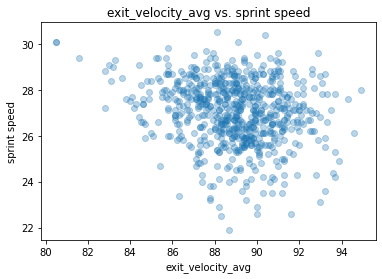

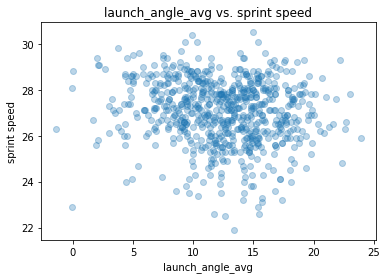

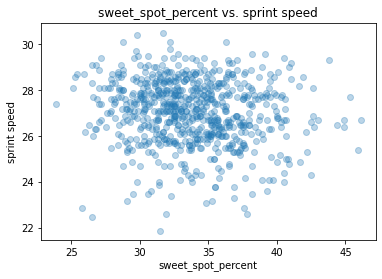

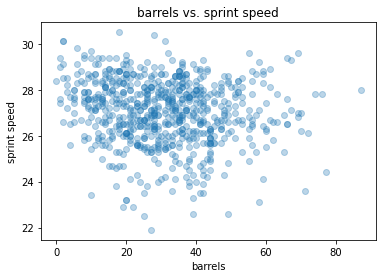

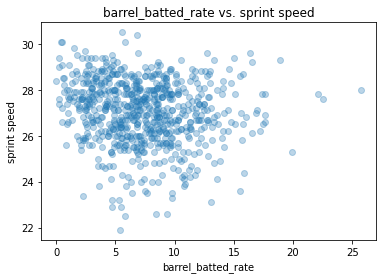

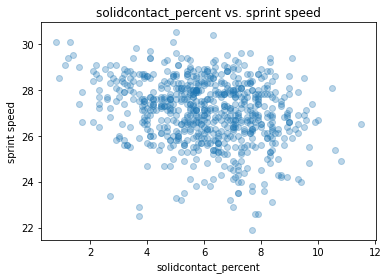

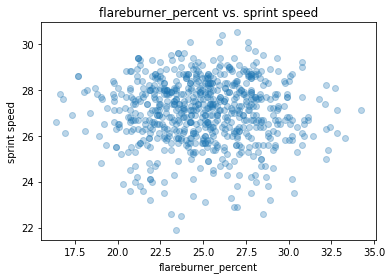

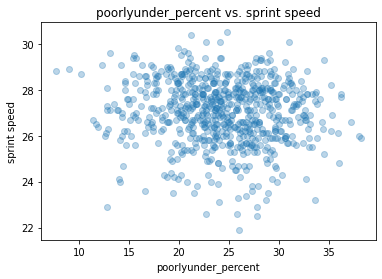

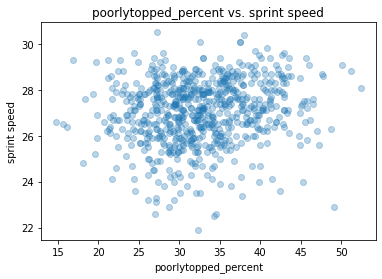

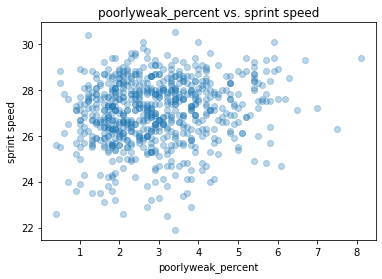

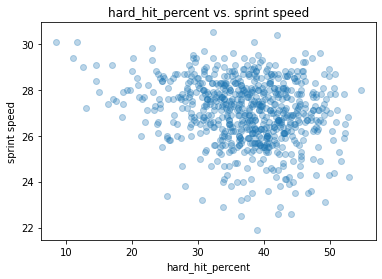

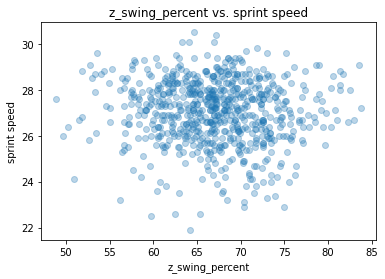

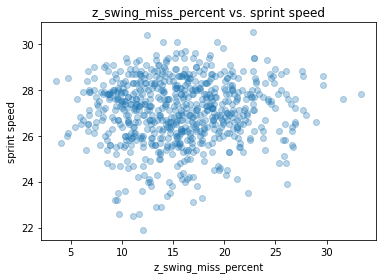

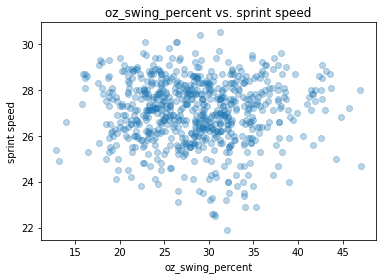

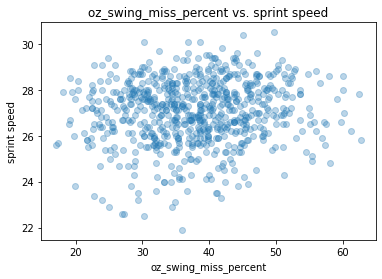

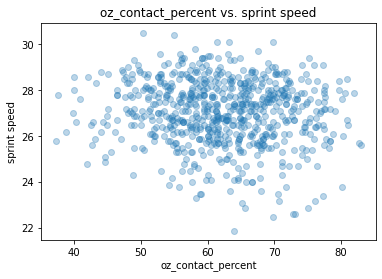

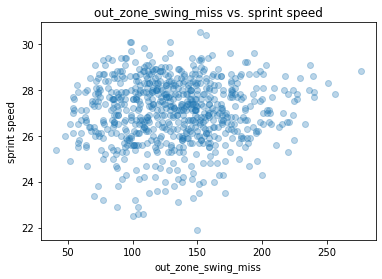

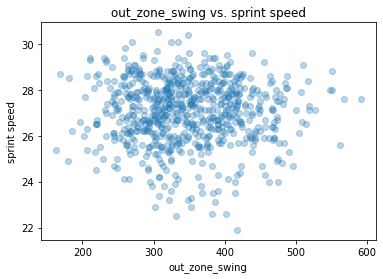

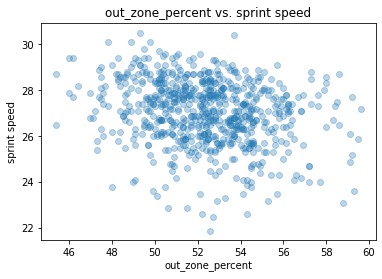

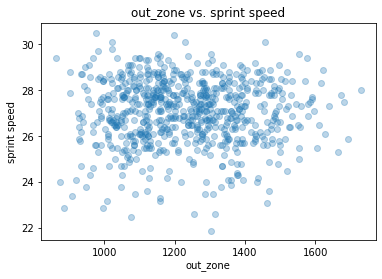

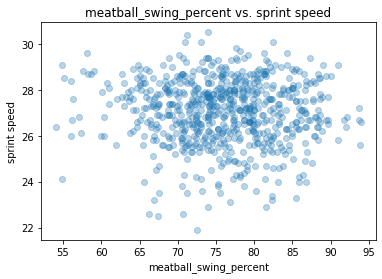

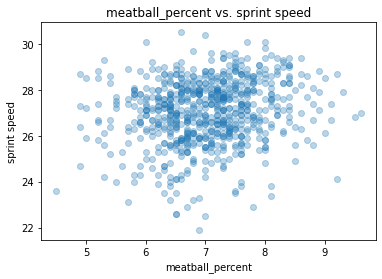

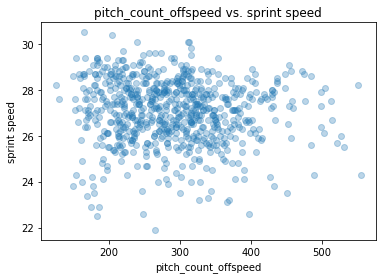

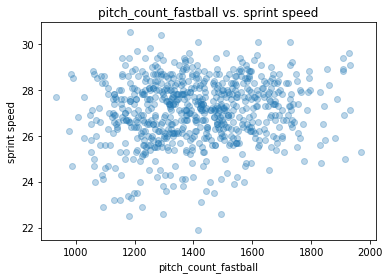

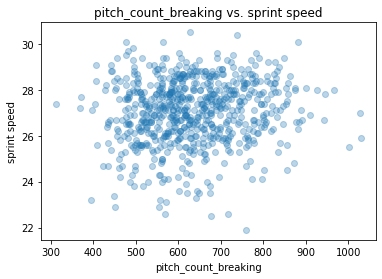

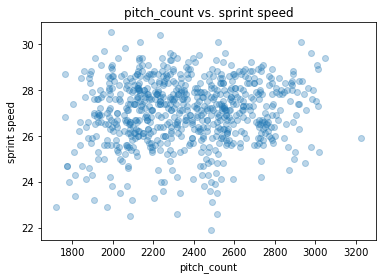

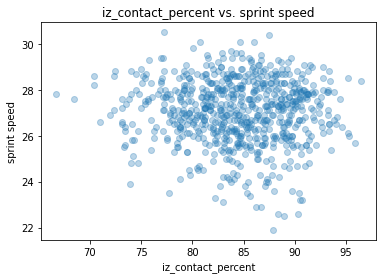

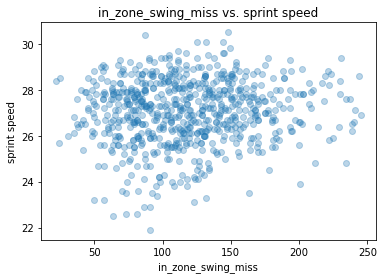

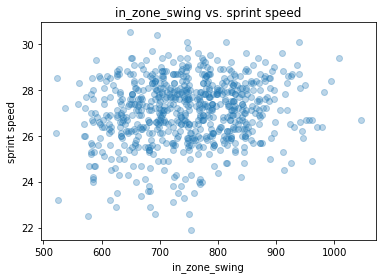

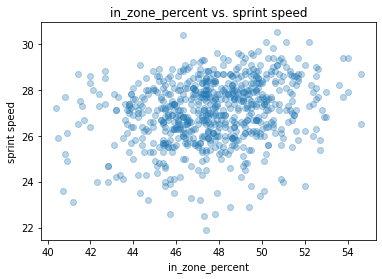

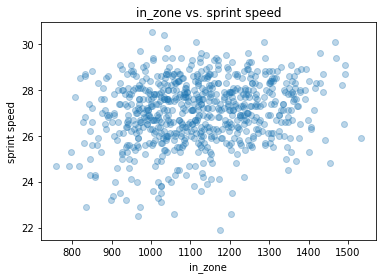

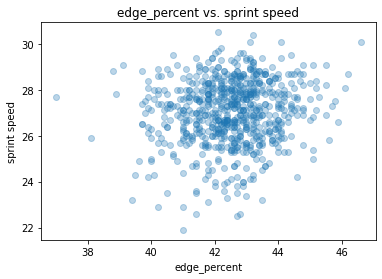

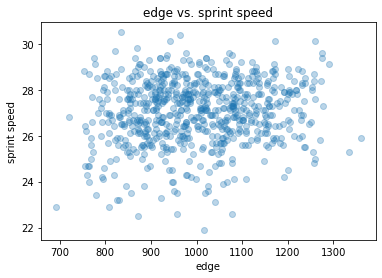

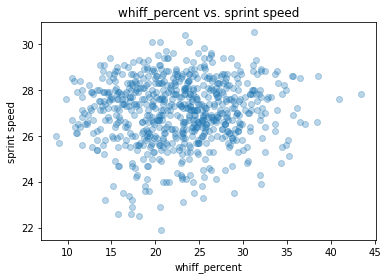

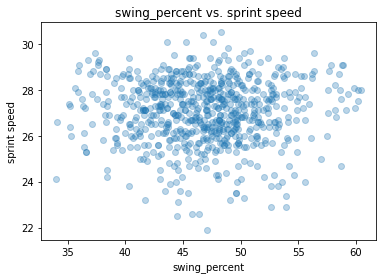

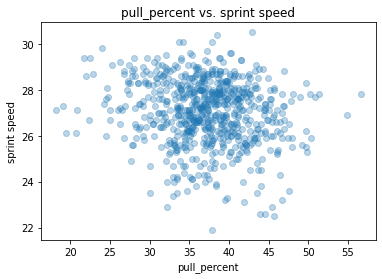

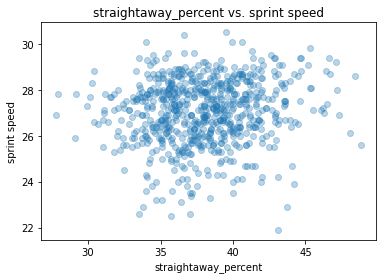

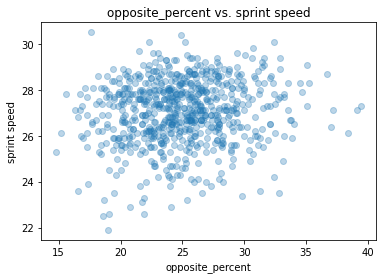

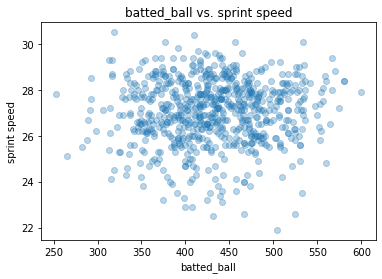

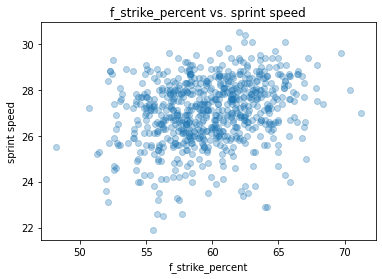

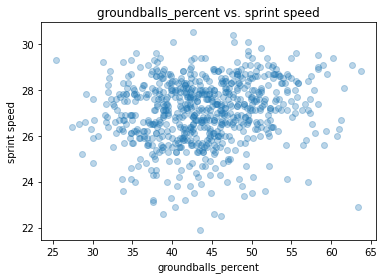

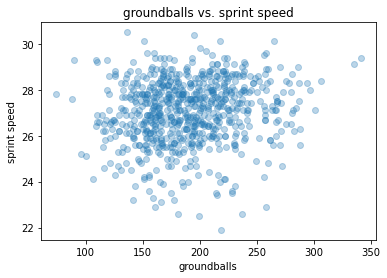

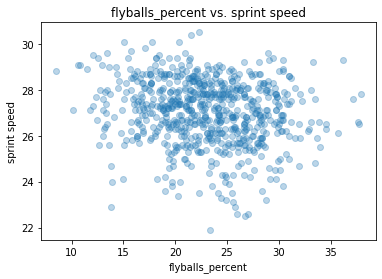

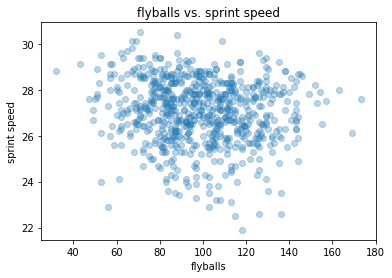

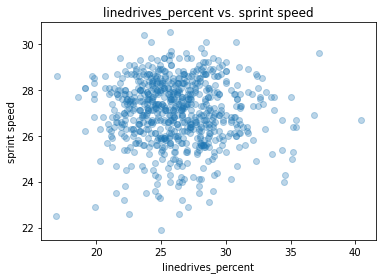

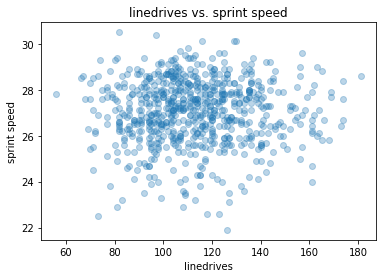

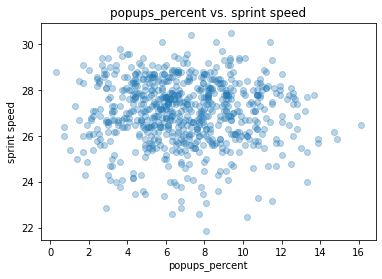

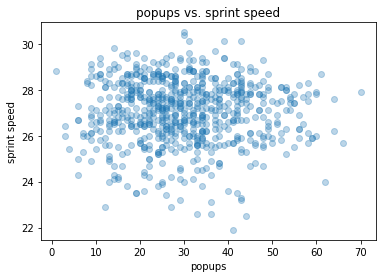

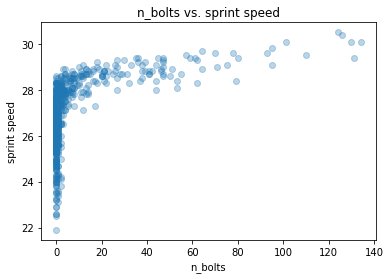

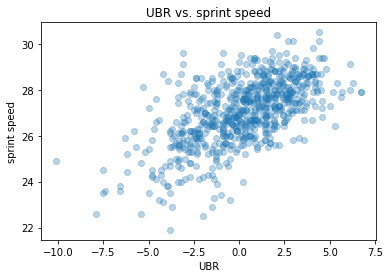

In [8]:
i = 0
for x in predictors:
  plt.figure(i)
  plt.scatter(data_all_years[x], data_all_years['sprint_speed'],alpha = 0.3)
  plt.xlabel(x)
  plt.ylabel('sprint speed')
  plt.title(x + ' vs. sprint speed')
  i = i + 1

In [9]:
X = np.array(data_all_years[["solidcontact_percent","barrels","flyballs_percent", "f_strike_percent","n_bolts", "UBR"]])

In [10]:
import statsmodels.api as sm

In [11]:
ss_model = sm.OLS(data_all_years['sprint_speed'],X)
ss_model_results = ss_model.fit()
print(ss_model_results.pvalues)

x1    3.163620e-02
x2    9.549012e-02
x3    1.823224e-11
x4    0.000000e+00
x5    1.163428e-15
x6    3.103062e-24
dtype: float64


Based on the above p - value output, it seems that all but the second predictor are signidficant(based off of a minimal significance p-value threshold of 0.05 or below). This insignificant predictor is:

barrels(with p-value = 0.0955)


In [14]:
# Make a reduced model without the above predictor

ss_preds_red = np.array(data_all_years[["solidcontact_percent","flyballs_percent", "f_strike_percent","n_bolts", "UBR"]])

ss_model_red = sm.OLS(data_all_years['sprint_speed'],ss_preds_red)
ss_model_red_results = ss_model_red.fit()

In [13]:
# Running the anova model to test whether it is ok to remove this predictor

anovatest = anova_lm(ss_model_red_results, ss_model_results)
print(anovatest)

   df_resid          ssr  df_diff   ss_diff         F   Pr(>F)
0     699.0  1716.754130      0.0       NaN       NaN      NaN
1     698.0  1709.927073      1.0  6.827057  2.786836  0.09549


Since the above output yields a p-vlaue above our threshold of 0.05, we will remove the insignificant predictor "barrels" as it is not adding anything to the model.

Final Model:

sprint_speed ~ solidcontact_percent + flyballs_percent + f_strike_percent + n_bolts + UBR